# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [83]:
# Instalação de bibliotecas básicas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import plotly.express as px
import seaborn as sns


url = "https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv"
df = pd.read_csv(url)

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [85]:
print("Visualização das primeiras linhas do dataset:")
display(df.head())


Visualização das primeiras linhas do dataset:


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,sh,sot,dist,fk,pk,pkatt,season,team,placar,dia_semana
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,1.0,Domingo
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,5.0,Sábado
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,5.0,Sábado
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,1.0,Sábado
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,0.0,Sábado


In [86]:
print(f"\nShape do dataset: {df.shape}")


Shape do dataset: (1389, 30)


In [87]:
print("\nTipos de dados por coluna:")
print(df.dtypes)


Tipos de dados por coluna:
Unnamed: 0               int64
date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
placar                 float64
dia_semana              object
dtype: object


In [88]:
print("\nDados ausentes por coluna:")
print(df.isnull().sum())


Dados ausentes por coluna:
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
placar             0
dia_semana         0
dtype: int64


In [89]:
print("\nEstatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,Unnamed: 0,date,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season,placar
count,1389.000000,1389,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,22.771778,2021-06-22 15:00:54.427645696,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844,2.716343
min,0.000000,2020-09-12 00:00:00,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000,0.000000
25%,11.000000,2021-01-16 00:00:00,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000,1.000000
50%,22.000000,2021-05-11 00:00:00,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000,3.000000
75%,33.000000,2021-12-06 00:00:00,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000,4.000000
max,59.000000,2022-04-25 00:00:00,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000,9.000000
std,13.668172,NaN,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951,1.709913


## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

<ipython-input-84-981f693fb929>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-84-981f693fb929>:26: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



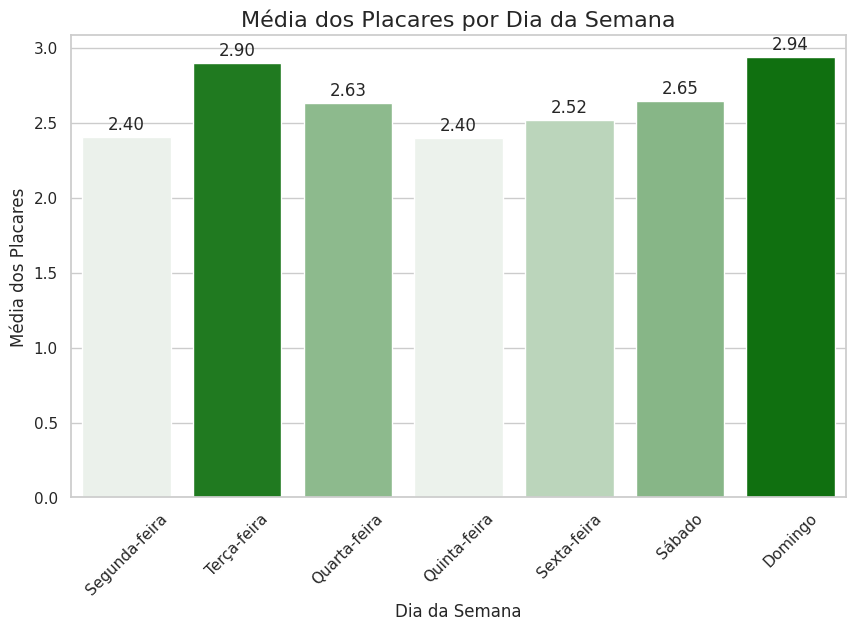

In [84]:
df['placar'] = df['gf'] + df['ga']

df['date'] = pd.to_datetime(df['date'])

dias_traduzidos = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['dia_semana'] = df['date'].dt.day_name().map(dias_traduzidos)

placares_por_dia = df.groupby('dia_semana')['placar'].mean()

dias_ordenados_pt = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
placares_por_dia = placares_por_dia.reindex(dias_ordenados_pt)

norm = plt.Normalize(placares_por_dia.min(), placares_por_dia.max())
colors = sns.light_palette("green", as_cmap=True)(norm(placares_por_dia.values))

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(x=placares_por_dia.index, y=placares_por_dia.values, palette=colors)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9), textcoords='offset points')

plt.title('Média dos Placares por Dia da Semana', fontsize=16)
plt.ylabel('Média dos Placares', fontsize=12)
plt.xlabel('Dia da Semana', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

<ipython-input-82-6f308d5f7158>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-82-6f308d5f7158>:3: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



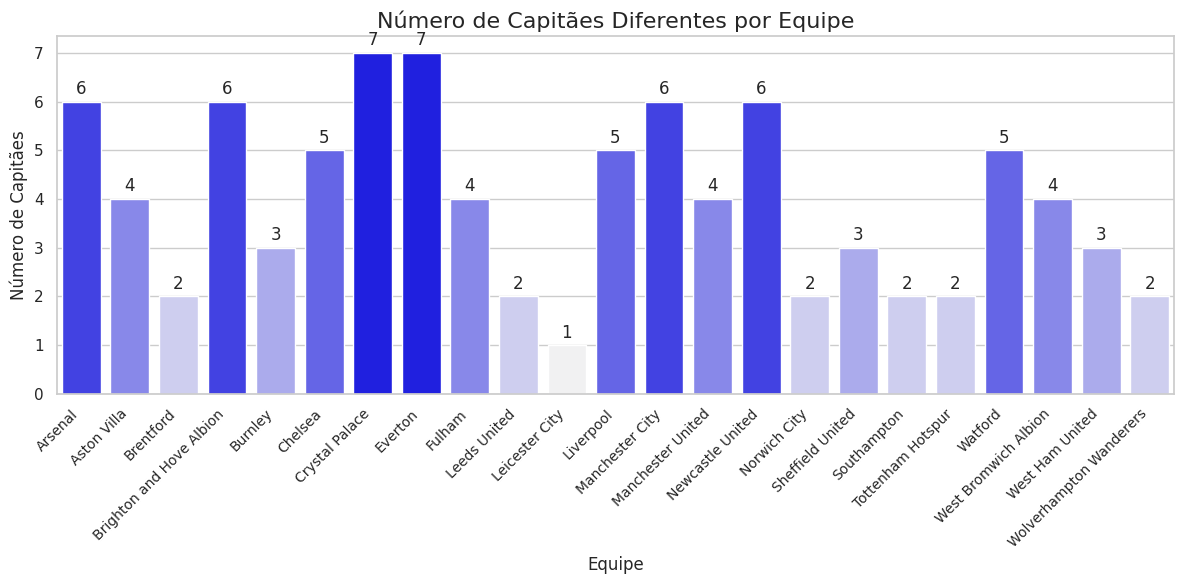

In [82]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(x=capitaes_por_equipe.index, y=capitaes_por_equipe.values, palette=colors)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9), textcoords='offset points')

plt.title('Número de Capitães Diferentes por Equipe', fontsize=16)
plt.ylabel('Número de Capitães', fontsize=12)
plt.xlabel('Equipe', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()

plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

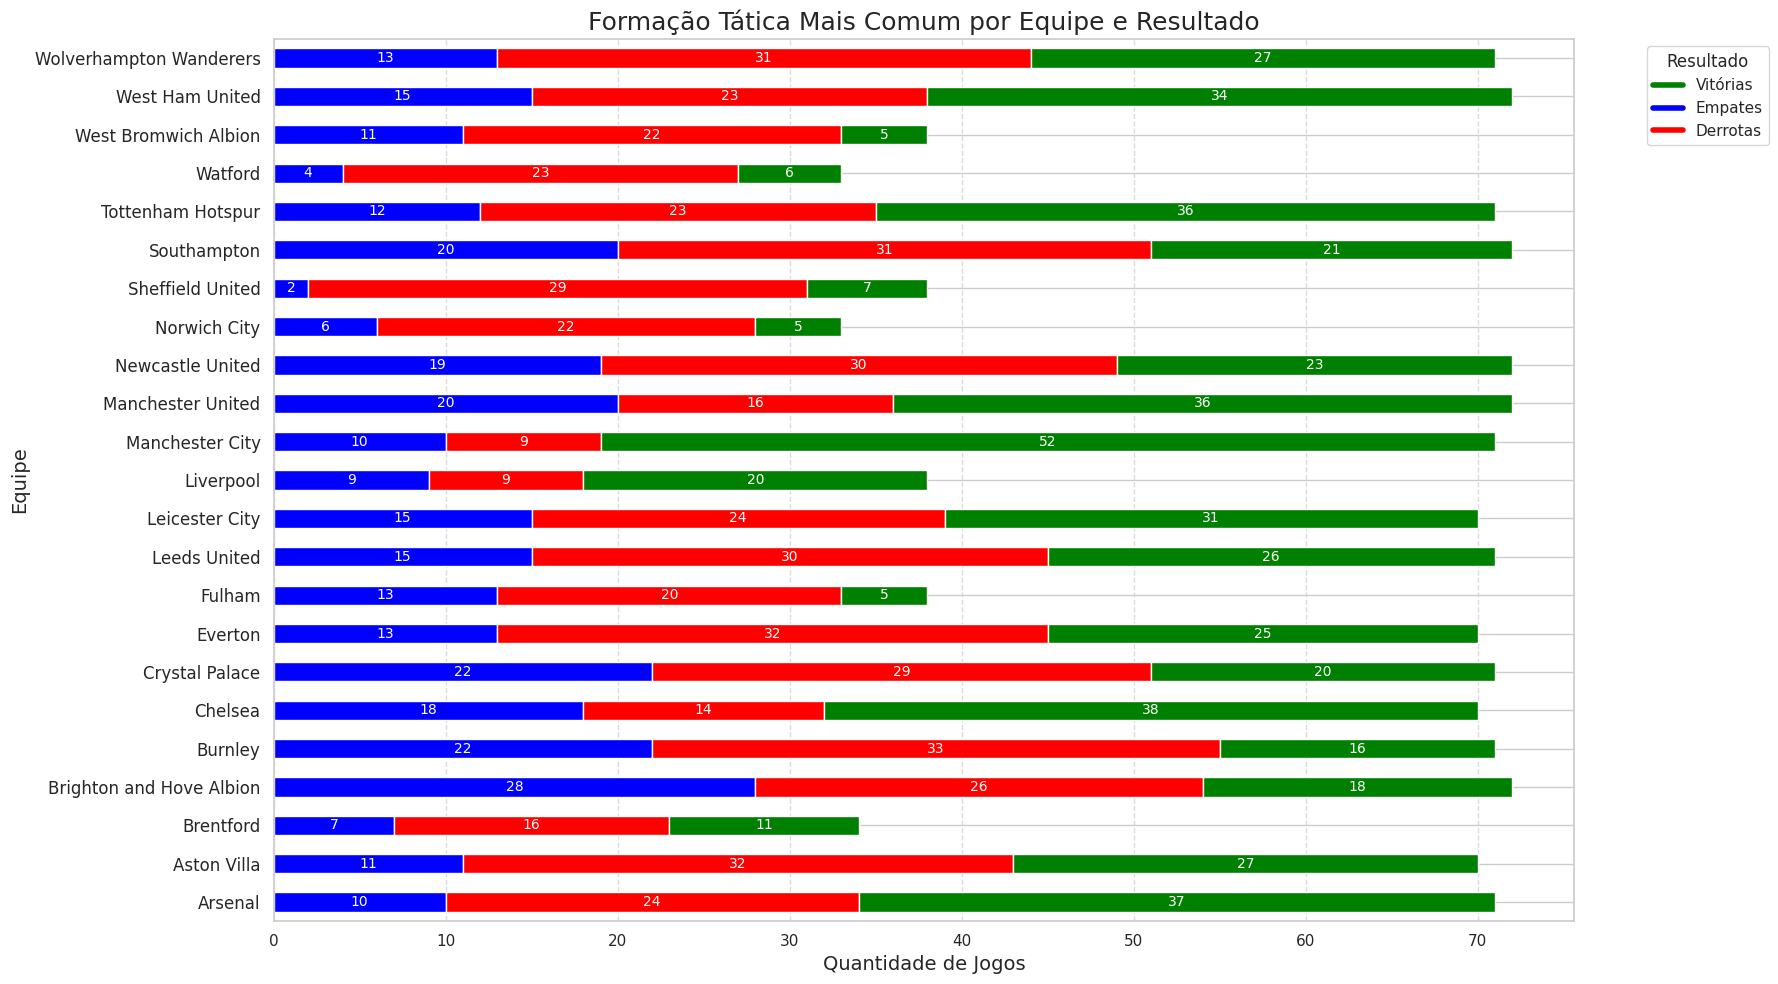

In [75]:
most_common_formation = df.groupby(['team', 'result'])['formation'].agg(lambda x: x.mode().iloc[0]).reset_index()

count_by_team_result = df.groupby(['team', 'result']).size().reset_index(name='count')

merged = pd.merge(most_common_formation, count_by_team_result, on=['team', 'result'])

comparison_table = merged.pivot(index='team', columns='result', values='count').fillna(0)

colors = {'W': 'green', 'D': 'blue', 'L': 'red'}

fig, ax = plt.subplots(figsize=(16, 10))

comparison_table.plot(kind='barh', stacked=True, color=[colors[result] for result in comparison_table.columns], ax=ax)

for i, (team, row) in enumerate(comparison_table.iterrows()):
    cumulative = 0
    for result in comparison_table.columns:
        count = row[result]
        if count > 0:
            ax.text(cumulative + count / 2, i, f'{int(count)}', ha='center', va='center', fontsize=10, color='white')
            cumulative += count

plt.title('Formação Tática Mais Comum por Equipe e Resultado', fontsize=18)
plt.xlabel('Quantidade de Jogos', fontsize=14)
plt.ylabel('Equipe', fontsize=14)

plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

legend_labels = {'W': 'Vitórias', 'D': 'Empates', 'L': 'Derrotas'}
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
ax.legend(handles, [legend_labels[result] for result in legend_labels.keys()], title='Resultado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

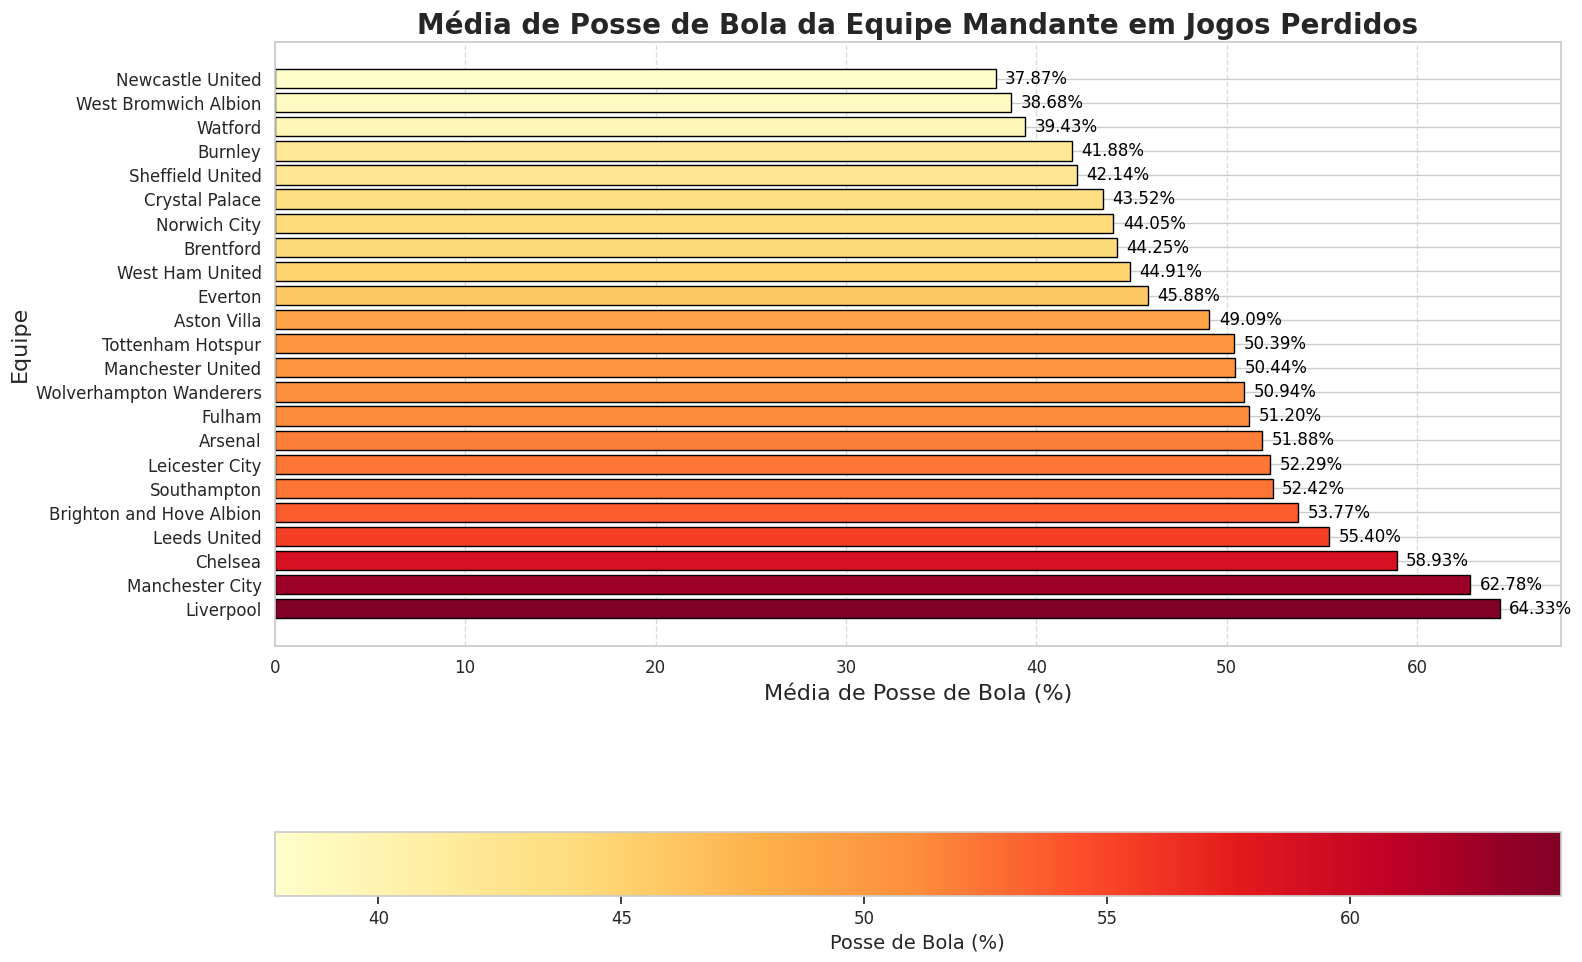

In [74]:
lost_games = df[df['result'] == 'L']

mean_possession = lost_games.groupby('team')['poss'].mean().reset_index()

mean_possession_sorted = mean_possession.sort_values(by='poss', ascending=False)

norm = plt.Normalize(mean_possession_sorted['poss'].min(), mean_possession_sorted['poss'].max())
cmap = plt.get_cmap('YlOrRd')

fig, ax = plt.subplots(figsize=(16, 10))

bars = ax.barh(mean_possession_sorted['team'], mean_possession_sorted['poss'],
                color=[cmap(norm(val)) for val in mean_possession_sorted['poss']], edgecolor='black')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%',
            va='center', ha='left', fontsize=12, color='black')

plt.title('Média de Posse de Bola da Equipe Mandante em Jogos Perdidos', fontsize=20, fontweight='bold')
plt.xlabel('Média de Posse de Bola (%)', fontsize=16)
plt.ylabel('Equipe', fontsize=16)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.2)
cbar.set_label('Posse de Bola (%)', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()

plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [98]:
def calculate_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    return 0

df['points'] = df['result'].apply(calculate_points)

points_table = df.groupby('team')['points'].sum().reset_index()
points_table = points_table.sort_values(by='points', ascending=False).reset_index(drop=True)

points_table['position'] = points_table.index + 1

team_logos = {
    'Manchester City': 'https://logodetimes.com/wp-content/uploads/manchester-city-football-club.png',
    'Liverpool': 'https://logodetimes.com/wp-content/uploads/liverpool-football-club.png',
    'Arsenal': 'https://logodetimes.com/wp-content/uploads/arsenal-football-club.png',
    'Chelsea': 'https://logodetimes.com/wp-content/uploads/chelsea-football-club.png',
    'Tottenham': 'https://logodetimes.com/wp-content/uploads/tottenham-hotspur-football-club.png',
    'Manchester United': 'https://logodetimes.com/wp-content/uploads/manchester-united-football-club.png',
    'West Ham': 'https://logodetimes.com/wp-content/uploads/west-ham-united-football-club.png',
    'Wolves': 'https://logodetimes.com/wp-content/uploads/wolverhampton-wanderers-football-club.png',
    'Everton': 'https://logodetimes.com/wp-content/uploads/Everton-club.png',
    'Leicester': 'https://logodetimes.com/wp-content/uploads/leicester-city-football-club.png',
    'Newcastle United': 'https://logodetimes.com/wp-content/uploads/Newcastle-United-club.png',
    'Aston Villa': 'https://logodetimes.com/wp-content/uploads/Aston-Villa-club.png',
    'Sheffield United': 'https://logodetimes.com/wp-content/uploads/Sheffield-United-club.png',
    'Brighton': 'https://logodetimes.com/wp-content/uploads/Brighton-club.png',
    'Burnley': 'https://logodetimes.com/wp-content/uploads/Burnley-club.png',
    'Fulham': 'https://logodetimes.com/wp-content/uploads/Fulham-club.png',
    'Crystal Palace': 'https://logodetimes.com/wp-content/uploads/Crystal-Palace-club.png',
    'Leeds United': 'https://logodetimes.com/wp-content/uploads/Leeds-United-club.png',
    'Nottingham Forest': 'https://logodetimes.com/wp-content/uploads/Nottingham-Forest-club.png',
    'Brentford': 'https://logodetimes.com/wp-content/uploads/Brentford-club.png'
}

points_table['logo'] = points_table['team'].map(team_logos)

def valid_image_url(url):
    import requests
    try:
        response = requests.head(url, allow_redirects=True)
        return response.status_code == 200
    except:
        return False

points_table['logo'] = points_table['logo'].apply(lambda x: x if valid_image_url(x) else 'https://via.placeholder.com/30')

html_table = points_table.to_html(escape=False, formatters={'logo': lambda x: f'<img src="{x}" width="30" height="30">'})
display(HTML(html_table))


,team,points,position,logo
0,Manchester City,166,1,
1,Chelsea,132,2,
2,Manchester United,128,3,
3,Arsenal,121,4,
4,Tottenham Hotspur,120,5,
5,West Ham United,117,6,
6,Leicester City,108,7,
7,Wolverhampton Wanderers,94,8,
8,Leeds United,93,9,
9,Aston Villa,92,10,


# Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado aqui.

Um exemplo usando gráficos pode ser encontrado aqui

In [99]:
team_attendance = df.groupby('team')['attendance'].sum().reset_index().sort_values(by='attendance', ascending=True)

def format_number(x):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.1f}K'
    else:
        return str(x)

team_attendance['formatted_attendance'] = team_attendance['attendance'].apply(format_number)

fig = px.bar(team_attendance,
             x='team',
             y='attendance',
             color='team',
             title='Público Total e Detalhamento por Jogos',
             labels={'attendance': 'Público', 'team': 'Equipe'},
             height=800,
             width=1000,
             text='formatted_attendance')

fig.update_traces(marker=dict(color='royalblue'),
                  selector=dict(mode='markers+text'))

fig.update_layout(clickmode='event+select')

fig.update_traces(
    hovertemplate='Equipe: %{x}<br>Público Total: %{y:,}<extra></extra>'
)

fig.update_layout(
    xaxis_title='Equipe',
    yaxis_title='Público Total',
    xaxis_tickangle=-45,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=16,
    margin=dict(l=200, r=50, t=50, b=100)
)

fig.show()